# Importing the libraries

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Load the preprocessed data

In [15]:

preprocessed_heart_df = pd.read_csv('C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/data/heart_disease/preprocessed_heart_data.csv')

# Separate the features and the target variable

In [16]:

X = preprocessed_heart_df.drop('target', axis=1)
y = preprocessed_heart_df['target']


# Split the dataset into training and testing sets

In [17]:

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Train the SVM model

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM model
svm = SVC()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the SVM model with the best parameters
best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train, y_train)

# Make predictions
best_svm_predictions = best_svm_model.predict(X_test)

# Evaluate the model
best_svm_accuracy = accuracy_score(y_test, best_svm_predictions)
print(f"Best SVM Accuracy: {best_svm_accuracy}")


Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Accuracy: 0.7912087912087912


In [19]:
# Assuming X_train and X_test are your original datasets
# Check the number of features in the training set
num_features_train = X_train.shape[1]
print(f"Number of features in the training set: {num_features_train}")

# Check the number of features in the testing set
num_features_test = X_test.shape[1]
print(f"Number of features in the testing set: {num_features_test}")


Number of features in the training set: 13
Number of features in the testing set: 13


In [20]:
# Print the names of the features in the training set
print("Feature names in the training set:")
for feature_name in X_train.columns:
    print(feature_name)


Feature names in the training set:
age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal



# Plotting the confusion matrix

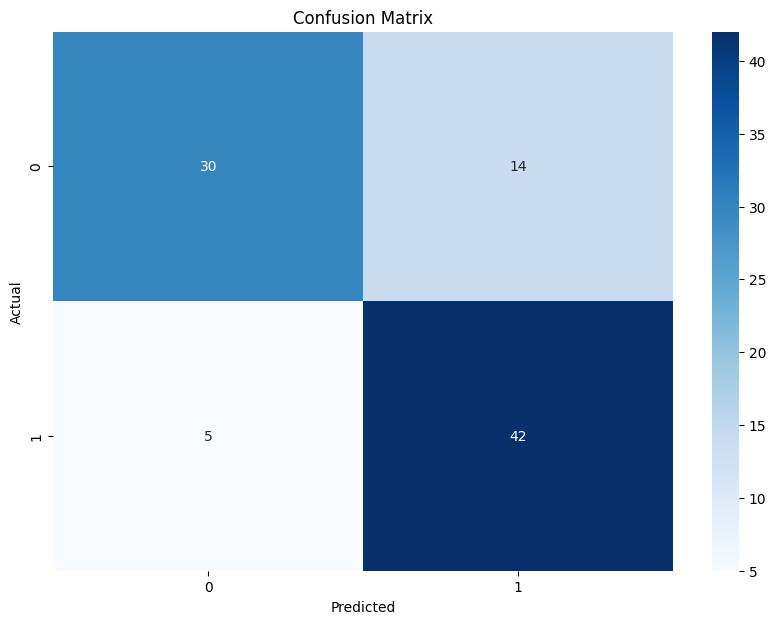

In [21]:

# Assuming svm_predictions_selected is the predictions from your SVM model with selected features
cm = confusion_matrix(y_test, best_svm_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plotting the ROC curve

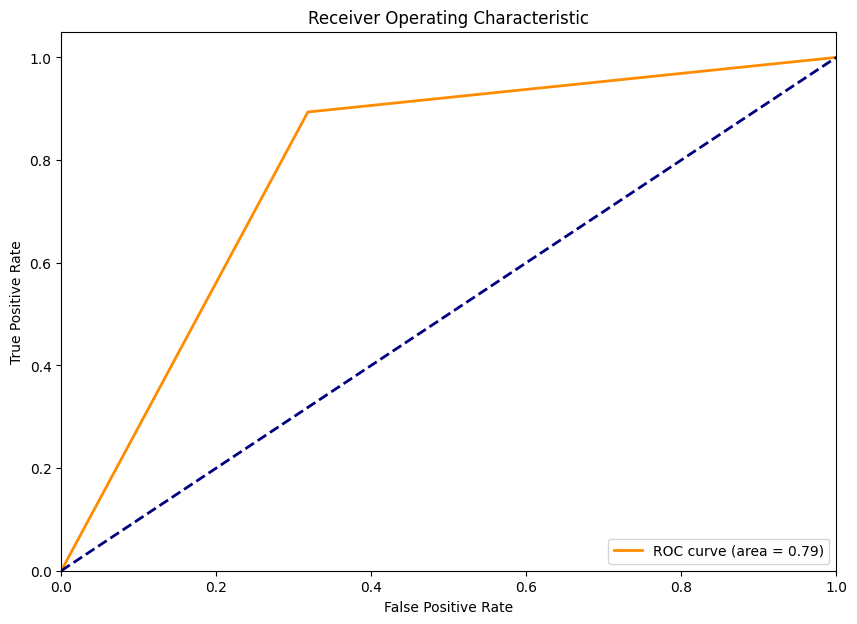

In [22]:
# Calculate ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, best_svm_predictions)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# classification report

In [23]:

print(classification_report(y_test, best_svm_predictions))


              precision    recall  f1-score   support

           0       0.86      0.68      0.76        44
           1       0.75      0.89      0.82        47

    accuracy                           0.79        91
   macro avg       0.80      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91



# Save the model to a file

In [24]:
import pickle
# Save the best SVM model to a file
with open('C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/heart_disease/svm_model.pkl', 'wb') as file:
    pickle.dump(best_svm_model, file)


# Load the model from a file

In [13]:
# Load the best SVM model from a file
with open('C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/heart_disease/svm_model.pkl', 'rb') as file:
    svm_model = pickle.load(file)


In [2]:
import pickle
import numpy as np

# Load the diabetes model
model_path = 'C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/diabetes/svm_model.pkl'
with open(model_path, 'rb') as file:
    diabetes_model = pickle.load(file)

# Example input data for diabetes
input_data = {
    'Pregnancies': 6,
    'Glucose': 148.0,
    'BloodPressure': 72.0,
    'SkinThickness': 35.0,
    'Insulin': 169.5,
    'BMI': 33.6,
    'DiabetesPedigreeFunction': 0.627,
    'Age': 50
}

# Transform the input data according to your logic
dic2 = {'NewBMI_Obesity 1': 0, 'NewBMI_Obesity 2': 0, 'NewBMI_Obesity 3': 0, 'NewBMI_Overweight': 0,
        'NewBMI_Underweight': 0, 'NewInsulinScore_Normal': 0, 'NewGlucose_Low': 0,
        'NewGlucose_Normal': 0, 'NewGlucose_Overweight': 0, 'NewGlucose_Secret': 0}

if input_data['BMI'] <= 18.5:
    dic2['NewBMI_Underweight'] = 1
elif 18.5 < input_data['BMI'] <= 24.9:
    pass
elif 24.9 < input_data['BMI'] <= 29.9:
    dic2['NewBMI_Overweight'] = 1
elif 29.9 < input_data['BMI'] <= 34.9:
    dic2['NewBMI_Obesity 1'] = 1
elif 34.9 < input_data['BMI'] <= 39.9:
    dic2['NewBMI_Obesity 2'] = 1
elif input_data['BMI'] > 39.9:
    dic2['NewBMI_Obesity 3'] = 1

if 16 <= input_data['Insulin'] <= 166:
    dic2['NewInsulinScore_Normal'] = 1

if input_data['Glucose'] <= 70:
    dic2['NewGlucose_Low'] = 1
elif 70 < input_data['Glucose'] <= 99:
    dic2['NewGlucose_Normal'] = 1
elif 99 < input_data['Glucose'] <= 126:
    dic2['NewGlucose_Overweight'] = 1
elif input_data['Glucose'] > 126:
    dic2['NewGlucose_Secret'] = 1

input_data.update(dic2)
values2 = list(map(float, list(input_data.values())))

# Make a prediction
values = np.asarray(values2)
prediction = diabetes_model.predict(values.reshape(1, -1))[0]

print("Prediction:", prediction)


Prediction: 1


C:\Users\SIDDHI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
